In [1]:
############################################################################################################

# import data_lib
import win32com.client as win32
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/Malgunsl.ttf").get_name()
rc('font', family=font_name)
############################################################################################################



#파일 - 데이터프레임으로 받아오기
fname1 = r"D:\★프로세스 혁신★\22.01월\1. AI 업체, 데이터분석 조사\DATA 모음\코로나 확진자수_22-0325.xlsx"
    

    
# 기본 처리
excel = win32.dynamic.Dispatch('Excel.application')
excel.Visible = False #True
excel.DisplayAlerts = False #True

wb1 = excel.Workbooks.Open(fname1, False, True, None)


pd.options.display.float_format = '{:,.1f}'.format
pd.options.display.max_rows = 100
pd.options.display.max_columns = 20


In [2]:


# =============================================================================
# 
# # 데이터 확인 
# 
# =============================================================================


#데이터 프레임으로 저장, 각 시트 데이터를 df 변환
ws1 = wb1.Worksheets(1)
print(ws1.name)
df1 = pd.DataFrame(ws1.UsedRange())
df1.info()
print("HCprice_all_data_2017_2022.xlsx")
print(df1)



# 엑셀은 닫기 (메모리 정리)
wb1.Close(SaveChanges=False)  



데이터
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Columns: 587 entries, 0 to 586
dtypes: object(587)
memory usage: 156.0+ KB
HCprice_all_data_2017_2022.xlsx
                     0        1     2           3           4           5    \
0   ○ 코로나 19발생현황 (해외) []     None  None        None        None        None   
1                    국가별       항목    단위  2020.05.01  2020.05.02  2020.05.03   
2                     한국  확진자수[명]     명    10,774.0    10,780.0    10,793.0   
3                     한국  사망자수[명]     명       248.0       250.0       250.0   
4                     중국  확진자수[명]     명    82,874.0    82,875.0    82,877.0   
5                     중국  사망자수[명]     명     4,633.0     4,633.0     4,633.0   
6                     인도  확진자수[명]     명    33,050.0    35,043.0    37,776.0   
7                     인도  사망자수[명]     명     1,074.0     1,147.0     1,223.0   
8                     일본  확진자수[명]     명    14,281.0    14,545.0    14,839.0   
9                     일본  사망자

In [5]:
# =============================================================================
# 
# 
# # data에 대해 알아가는 과정 - 적절한 dataframe 형태로 변환 - ndf1
# 
# 
# =============================================================================

df1.info()
df1.shape
df1.head()
df1.iloc[1,:]

ndf1 = df1.iloc[1:,:]
# ndf1.iloc[2,:]


# 확진자수 추출 - ndf2
list(range(1,34,2))
ndf2 = ndf1.drop(labels = range(3,34,2), axis=0)


# 행/열 바꾸고, date기준 정리 - ndf3
temp = ndf2.transpose()
temp.head(10)

temp.iloc[1:3,:]
temp.columns = temp.iloc[0,:]

ndf3 = temp.drop([0,1,2], axis=0)

print(ndf3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Columns: 587 entries, 0 to 586
dtypes: object(587)
memory usage: 156.0+ KB
0           국가별           한국        중국           인도          일본       대만  \
3    2020.05.01     10,774.0  82,874.0     33,050.0    14,281.0    429.0   
4    2020.05.02     10,780.0  82,875.0     35,043.0    14,545.0    429.0   
5    2020.05.03     10,793.0  82,877.0     37,776.0    14,839.0    432.0   
6    2020.05.04     10,801.0  82,880.0     40,263.0    15,057.0    432.0   
7    2020.05.05     10,793.0  82,881.0     42,533.0    15,231.0    438.0   
..          ...          ...       ...          ...         ...      ...   
582  2022.03.18  8,657,609.0 126,234.0 43,001,477.0 5,911,813.0 21,518.0   
583  2022.03.21  9,582,815.0 132,226.0 43,004,005.0 5,966,960.0 21,905.0   
584  2022.03.22  9,936,540.0 134,564.0 43,009,390.0 6,061,939.0 22,003.0   
585  2022.03.23 10,427,247.0 137,231.0 43,010,971.0 6,131,791.0 22,091.0   
586  2022.03.24 10,

In [6]:

# Date index 설정 및 데이터 타입 변환처리 
ndf3.rename(columns = {'국가별':'Date'},inplace=True)


ndf3 = ndf3.astype({'Date':'datetime64'})
ndf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 3 to 586
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    584 non-null    datetime64[ns]
 1   한국      584 non-null    object        
 2   중국      584 non-null    object        
 3   인도      584 non-null    object        
 4   일본      584 non-null    object        
 5   대만      584 non-null    object        
 6   태국      584 non-null    object        
 7   캐나다     584 non-null    object        
 8   멕시코     584 non-null    object        
 9   미국      584 non-null    object        
 10  브라질     584 non-null    object        
 11  터키      584 non-null    object        
 12  프랑스     584 non-null    object        
 13  독일      584 non-null    object        
 14  러시아     584 non-null    object        
 15  영국      584 non-null    object        
 16  호주      584 non-null    object        
dtypes: datetime64[ns](1), object(16)
memory usage: 77.7+ K

In [7]:
# Date 기준으로 indexing - ndf4
ndf3.set_index('Date', inplace=True)

ndf4 = ndf3.astype('float')


ndf4 = ndf3.replace(['', ' '], np.nan, inplace=False)
ndf4 = ndf4.astype('float')

ndf4.info()

ValueError: could not convert string to float: ''

In [9]:
ndf4 = ndf3.replace(['', ' '], np.nan, inplace=False)
ndf4 = ndf4.astype('float')

ndf4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 584 entries, 2020-05-01 to 2022-03-24
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   한국      580 non-null    float64
 1   중국      582 non-null    float64
 2   인도      554 non-null    float64
 3   일본      576 non-null    float64
 4   대만      579 non-null    float64
 5   태국      571 non-null    float64
 6   캐나다     487 non-null    float64
 7   멕시코     486 non-null    float64
 8   미국      493 non-null    float64
 9   브라질     418 non-null    float64
 10  터키      379 non-null    float64
 11  프랑스     400 non-null    float64
 12  독일      401 non-null    float64
 13  러시아     378 non-null    float64
 14  영국      399 non-null    float64
 15  호주      378 non-null    float64
dtypes: float64(16)
memory usage: 77.6 KB


<AxesSubplot:title={'center':'호주'}, xlabel='Date'>

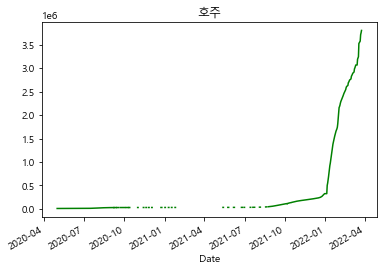

In [11]:
ndf4['호주'].plot(label='Cum', title='호주', c='g')

In [13]:
# 순증인력 - 칼럼 추가하기 - ndf6
ndf5 = ndf4[:]
print(ndf5.columns)

Index(['한국', '중국', '인도', '일본', '대만', '태국', '캐나다', '멕시코', '미국', '브라질', '터키',
       '프랑스', '독일', '러시아', '영국', '호주'],
      dtype='object', name=0)


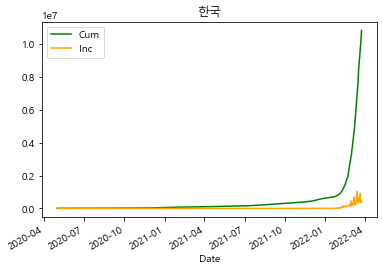

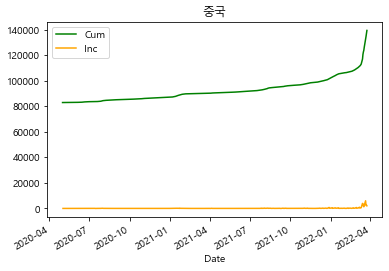

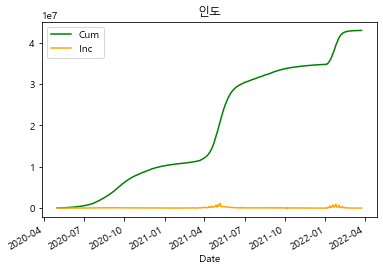

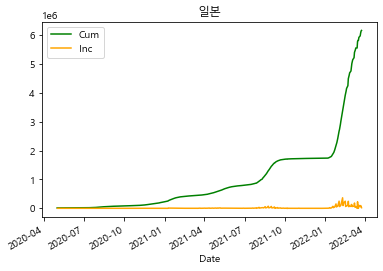

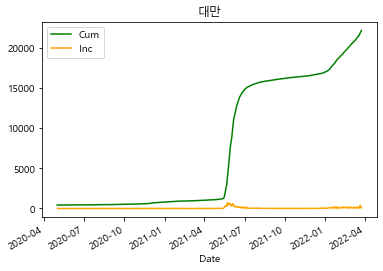

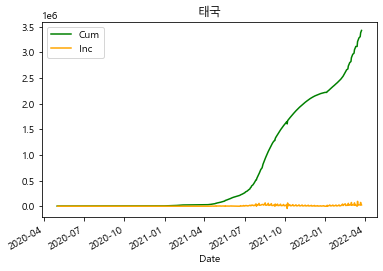

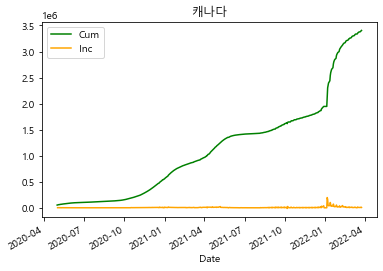

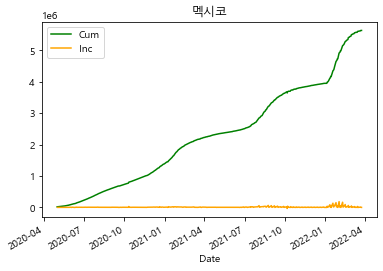

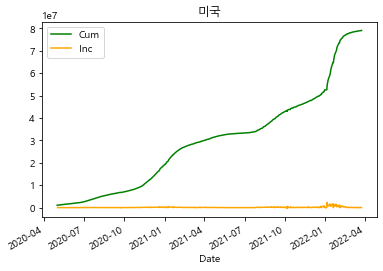

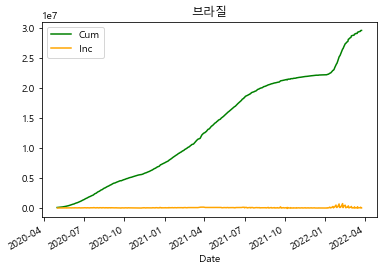

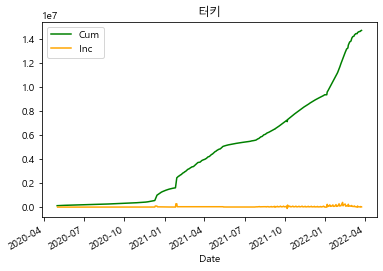

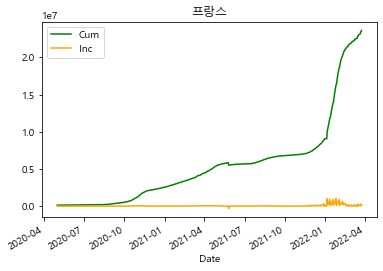

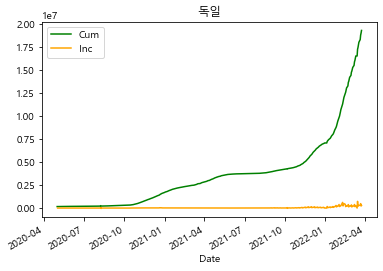

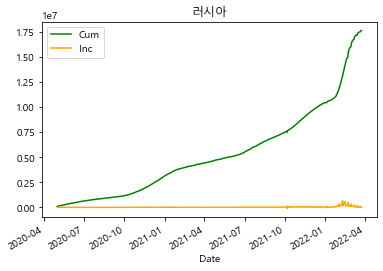

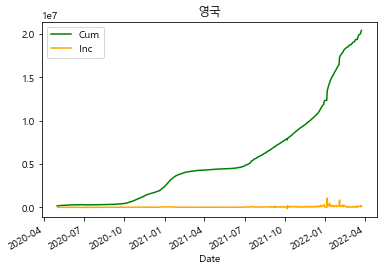

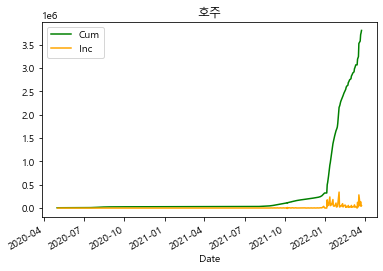

In [15]:
target = ['한국', '중국', '인도', '일본', '대만', '태국', '캐나다', '멕시코', '미국', '브라질', '터키',
       '프랑스', '독일', '러시아', '영국', '호주']

# for 문 돌려서 각 국가별로 순증 작업해주기
for i in target:
    
    temp1 = '전날_' + i
    temp2 = '순증_' + i
    
    ndf5[i] = ndf5[i].interpolate()         # 중간에 빠진 데이터 채워넣기

    
    ndf5[temp1] = ndf5[i].shift(1)          # 전날 확진자 
    ndf5[temp2] = ndf5[i] - ndf5[temp1]     # 순증 확진자
    
    # ndf6[[i, temp1, temp2]]
    
    
    #차트 그리기
    ndf5[i].plot(label='Cum', title=i, c='g')
    ndf5[temp2].plot(label='Inc', title=i, c='orange')
    
    plt.legend()
    plt.show()    

In [17]:
# ndf6.columns
ndf5.head()
ndf5.isnull().sum()


0
한국        0
중국        0
인도        0
일본        0
대만        0
태국        0
캐나다       0
멕시코       0
미국        0
브라질       0
터키        0
프랑스       0
독일        0
러시아       0
영국        0
호주        0
전날_한국     1
순증_한국     1
전날_중국     1
순증_중국     1
전날_인도     1
순증_인도     1
전날_일본     1
순증_일본     1
전날_대만     1
순증_대만     1
전날_태국     1
순증_태국     1
전날_캐나다    1
순증_캐나다    1
전날_멕시코    1
순증_멕시코    1
전날_미국     1
순증_미국     1
전날_브라질    1
순증_브라질    1
전날_터키     1
순증_터키     1
전날_프랑스    1
순증_프랑스    1
전날_독일     1
순증_독일     1
전날_러시아    1
순증_러시아    1
전날_영국     1
순증_영국     1
전날_호주     1
순증_호주     1
dtype: int64

In [18]:
ndf5 = ndf5.fillna(0)
ndf5.isnull().sum()

0
한국        0
중국        0
인도        0
일본        0
대만        0
태국        0
캐나다       0
멕시코       0
미국        0
브라질       0
터키        0
프랑스       0
독일        0
러시아       0
영국        0
호주        0
전날_한국     0
순증_한국     0
전날_중국     0
순증_중국     0
전날_인도     0
순증_인도     0
전날_일본     0
순증_일본     0
전날_대만     0
순증_대만     0
전날_태국     0
순증_태국     0
전날_캐나다    0
순증_캐나다    0
전날_멕시코    0
순증_멕시코    0
전날_미국     0
순증_미국     0
전날_브라질    0
순증_브라질    0
전날_터키     0
순증_터키     0
전날_프랑스    0
순증_프랑스    0
전날_독일     0
순증_독일     0
전날_러시아    0
순증_러시아    0
전날_영국     0
순증_영국     0
전날_호주     0
순증_호주     0
dtype: int64

In [23]:
# 원하는 칼럼만 가려내기 - ndf7
ndf6 = []
for i in ndf5.columns:
    if "순증" in i:
        ndf6.append(ndf5[i])

ndf6 = pd.DataFrame(ndf6).transpose()

ndf6.shape
ndf6.head()

,순증_한국,순증_중국,순증_인도,순증_일본,순증_대만,순증_태국,순증_캐나다,순증_멕시코,순증_미국,순증_브라질,순증_터키,순증_프랑스,순증_독일,순증_러시아,순증_영국,순증_호주
Date,,,,,,,,,,,,,,,,
2020-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-02,6.0,1.0,"1,993.0",264.0,0.0,6.0,"1,601.0","1,515.0","32,908.0","6,209.0","2,188.0",604.0,"1,068.0","7,933.0","6,201.0",16.0
2020-05-03,13.0,2.0,"2,733.0",294.0,3.0,6.0,"3,057.0",0.0,"29,918.0","4,970.0","1,983.0",794.0,890.0,"9,623.0","4,806.0",5.0
2020-05-04,8.0,3.0,"2,487.0",218.0,0.0,3.0,"2,760.0","1,349.0","27,572.0","4,588.0","1,670.0",308.0,697.0,"10,633.0","4,339.0",16.0
2020-05-05,-8.0,1.0,"2,270.0",174.0,6.0,18.0,370.0,"1,383.0","20,097.0","4,075.0","1,614.0",576.0,250.0,"10,581.0","3,985.0",18.0


In [24]:
# 칼럼 이름 변경하기
ndf6 = ndf6.rename(columns=lambda x: '7)Corvid_'+x)
ndf6.head()

,7)Corvid_순증_한국,7)Corvid_순증_중국,7)Corvid_순증_인도,7)Corvid_순증_일본,7)Corvid_순증_대만,7)Corvid_순증_태국,7)Corvid_순증_캐나다,7)Corvid_순증_멕시코,7)Corvid_순증_미국,7)Corvid_순증_브라질,7)Corvid_순증_터키,7)Corvid_순증_프랑스,7)Corvid_순증_독일,7)Corvid_순증_러시아,7)Corvid_순증_영국,7)Corvid_순증_호주
Date,,,,,,,,,,,,,,,,
2020-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-02,6.0,1.0,"1,993.0",264.0,0.0,6.0,"1,601.0","1,515.0","32,908.0","6,209.0","2,188.0",604.0,"1,068.0","7,933.0","6,201.0",16.0
2020-05-03,13.0,2.0,"2,733.0",294.0,3.0,6.0,"3,057.0",0.0,"29,918.0","4,970.0","1,983.0",794.0,890.0,"9,623.0","4,806.0",5.0
2020-05-04,8.0,3.0,"2,487.0",218.0,0.0,3.0,"2,760.0","1,349.0","27,572.0","4,588.0","1,670.0",308.0,697.0,"10,633.0","4,339.0",16.0
2020-05-05,-8.0,1.0,"2,270.0",174.0,6.0,18.0,370.0,"1,383.0","20,097.0","4,075.0","1,614.0",576.0,250.0,"10,581.0","3,985.0",18.0
